In [9]:
import prettymaps
import pandas as pd
import json
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import LineString, Point, Polygon

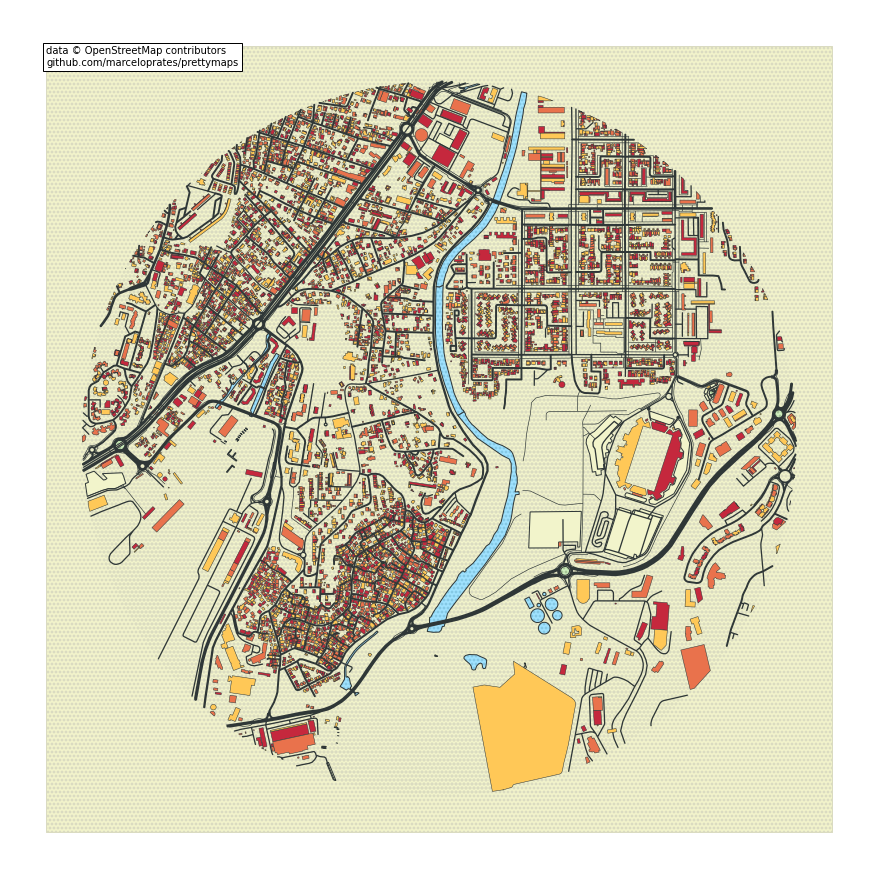

In [6]:
plot = prettymaps.plot(
    (14.603951,-61.0522004),
    circle = True,
    radius = 1100,
    layers = {
        "green": {
            "tags": {
                "landuse": "grass",
                "natural": ["island", "wood"],
                "leisure": "park"
            }
        },
        "forest": {
            "tags": {
                "landuse": "forest"
            }
        },
        "water": {
            "tags": {
                "natural": ["water", "bay"]
            }
        },
        "parking": {
            "tags": {
                "amenity": "parking",
                "highway": "pedestrian",
                "man_made": "pier"
            }
        },
        "streets": {
            "width": {
                "motorway": 5,
                "trunk": 5,
                "primary": 4.5,
                "secondary": 4,
                "tertiary": 3.5,
                "residential": 3,
            }
        },
        "building": {
            "tags": {"building": True},
        },
    },
    style = {
        "background": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "hatch": "ooo...",
        },
        "perimeter": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "lw": 0,
            "hatch": "ooo...",
        },
        "green": {
            "fc": "#D0F1BF",
            "ec": "#2F3737",
            "lw": 1,
        },
        "forest": {
            "fc": "#64B96A",
            "ec": "#2F3737",
            "lw": 1,
        },
        "water": {
            "fc": "#a1e3ff",
            "ec": "#2F3737",
            "hatch": "ooo...",
            "hatch_c": "#85c9e6",
            "lw": 1,
        },
        "parking": {
            "fc": "#F2F4CB",
            "ec": "#2F3737",
            "lw": 1,
        },
        "streets": {
            "fc": "#2F3737",
            "ec": "#475657",
            "alpha": 1,
            "lw": 0,
        },
        "building": {
            "palette": [
                "#FFC857",
                "#E9724C",
                "#C5283D"
            ],
            "ec": "#2F3737",
            "lw": 0.5,
        }
    }
)

In [4]:
prettymaps.presets()

,preset,params
0,barcelona,"{'layers': {'perimeter': {'circle': False}, 's..."
1,barcelona-plotter,{'layers': {'streets': {'width': {'primary': 5...
2,cb-bf-f,"{'layers': {'streets': {'width': {'trunk': 6, ..."
3,default,"{'layers': {'perimeter': {}, 'streets': {'widt..."
4,heerhugowaard,"{'layers': {'perimeter': {}, 'streets': {'widt..."
5,macao,"{'layers': {'perimeter': {}, 'streets': {'cust..."
6,minimal,"{'layers': {'perimeter': {}, 'streets': {'widt..."
7,tijuca,"{'layers': {'perimeter': {}, 'streets': {'widt..."


In [5]:
prettymaps.preset('default')


|            | layers                                                                                                                                                                                                          | style                                                                                                                                                                                                                                                                         | circle          | radius         |
|:-----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------|:---------------|
| perimeter  | {}<br>                                                                                                                                                                                                          | fill: false<br>lw: 0<br>zorder: 0<br>                                                                                                                                                                                                                                         | null<br>...<br> | 500<br>...<br> |
| streets    | width:<br>  cycleway: 3.5<br>  footway: 1<br>  motorway: 5<br>  pedestrian: 2<br>  primary: 4.5<br>  residential: 3<br>  secondary: 4<br>  service: 2<br>  tertiary: 3.5<br>  trunk: 5<br>  unclassified: 2<br> | alpha: 1<br>ec: '<span style="background-color:#475657; color:#fff">#475657</span>'<br>fc: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>lw: 0<br>zorder: 4<br>                                                                                      |                 |                |
| building   | tags:<br>  building: true<br>  landuse: construction<br>                                                                                                                                                        | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>lw: 0.5<br>palette:<br>- '<span style="background-color:#433633; color:#fff">#433633</span>'<br>- '<span style="background-color:#FF5E5B; color:#000">#FF5E5B</span>'<br>zorder: 5<br>             |                 |                |
| water      | tags:<br>  natural:<br>  - water<br>  - bay<br>                                                                                                                                                                 | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#a8e1e6; color:#000">#a8e1e6</span>'<br>hatch: ooo...<br>hatch_c: '<span style="background-color:#9bc3d4; color:#000">#9bc3d4</span>'<br>lw: 1<br>zorder: 3<br> |                 |                |
| forest     | tags:<br>  landuse: forest<br>                                                                                                                                                                                  | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#64B96A; color:#000">#64B96A</span>'<br>lw: 1<br>zorder: 2<br>                                                                                                  |                 |                |
| green      | tags:<br>  landuse:<br>  - grass<br>  - orchard<br>  leisure: park<br>  natural:<br>  - island<br>  - wood<br>                                                                                                  | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#8BB174; color:#000">#8BB174</span>'<br>hatch: ooo...<br>hatch_c: '<span style="background-color:#A7C497; color:#000">#A7C497</span>'<br>lw: 1<br>zorder: 1<br> |                 |                |
| beach      | tags:<br>  natural: beach<br>                                                                                                                                                                                   | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#FCE19C; color:#000">#FCE19C</span>'<br>hatch: ooo...<br>hatch_c: '<span style="background-color:#d4d196; color:#000">#d4d196</span>'<br>lw: 1<br>zorder: 3<br> |                 |                |
| parking    | tags:<br>  amenity: parking<br>  highway: pedestrian<br>  man_made: pier<br>                                                                                                                                    | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#F2F4CB; color:#000">#F2F4CB</span>'<br>lw: 1<br>zorder: 3<br>                                                                                                  |                 |                |
| background | .nan<br>...<br>                                                                                                                                                                                                 | fc: '<span style="background-color:#F2F4CB; color:#000">#F2F4CB</span>'<br>zorder: -1<br>                                                                                                                                                                                     |                 |                |

In [ ]:
plot = prettymaps.plot(
    (14.6071, -61.0692), # (14.7000,-61.066), #    (14.6064,-61.0684)
    circle = True,
    figsize=(20,20),
    radius = 1500,
    layers = {
        "forest": {
            "tags": {
                "landuse": "forest"
            }
        },
        "water": {
            "tags": {
                "natural": ["water", "bay"]
            }
        },
        "streets": {
            "width": {
                "motorway": 5,
                "trunk": 5,
                "primary": 4.5,
            }
        },
        "building": {
            "tags": {"historic": "manor", "historic":"castle"}, # "building": False, 
        },
    },
    style = {
        'background': {'fc': '#f7d794', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
        'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
        'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1, 'alpha': .5,},
        'water': {'fc': '#a8e1e6', 'ec': '#2F3737','lw': 1, 'zorder': 3},
        'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
        'building': {'palette': ['#e77f67', '#e15f41', '#f5cd79', '#f19066'], 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
    },
    save_as='output/2022-11-24.png'
)
_ = """
"background": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "hatch": "ooo...",
        },
        "perimeter": {
            "fc": "#F2F4CB",
            "ec": "#dadbc1",
            "lw": 0,
            "hatch": "ooo...",
        },
        "green": {
            "fc": "#D0F1BF",
            "ec": "#2F3737",
            "lw": 1,
        },
        "forest": {
            "fc": "#64B96A",
            "ec": "#2F3737",
            "lw": 1,
        },
        "water": {
            "fc": "#a1e3ff",
            "ec": "#2F3737",
            "hatch": "ooo...",
            "hatch_c": "#85c9e6",
            "lw": 1,
        },
        "parking": {
            "fc": "#F2F4CB",
            "ec": "#2F3737",
            "lw": 1,
        },
        "streets": {
            "fc": "#2F3737",
            "ec": "#475657",
            "alpha": 1,
            "lw": 0,
        },
        "building": {
            "palette": [
                "#FFC857",
                "#E9724C",
                "#C5283D"
            ],
            "ec": "#2F3737",
            "lw": 0.5,
        }
"""